### Confidence Intervals - Means
You have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

In [2]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [3]:
yes_coffee = coffee_red[coffee_red['drinks_coffee'] == True]
yes_coffee.user_id.count()/coffee_red.user_id.count()                        

0.595

In [4]:
no_coffee = coffee_red[coffee_red['drinks_coffee'] == False]
no_coffee.user_id.count()/coffee_red.user_id.count()                        

0.405

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [5]:
yes_coffee['height'].mean()

68.11962990858618

In [6]:
no_coffee['height'].mean()

66.78492279927877

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [7]:
coffee_new = coffee_full.sample(200)

In [8]:
yes_coffee_n = coffee_new[coffee_new['drinks_coffee'] == True]
yes_coffee_n.user_id.count()/coffee_new.user_id.count()              

0.58

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

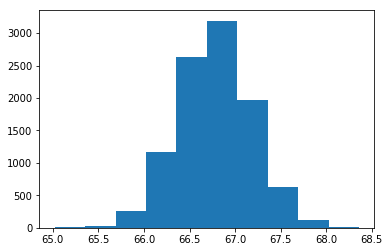

In [9]:
mean_heights = []
for i in range(10000):
    sample = coffee_red.sample(200, replace=True)
    no_coffee = sample[sample['drinks_coffee'] == False]
    mean_heights.append(no_coffee['height'].mean())
    
plt.hist(mean_heights);

In [10]:
np.percentile(mean_heights,2.5), np.percentile(mean_heights,97.5)

(65.99875357928227, 67.58246684063248)

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [11]:
coffee_full[coffee_full['drinks_coffee'] == False].height.mean()

66.44340776214705

### Confidence Intervals - Difference in Means

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [12]:
main_sample = coffee_full.sample(200)

In [13]:
mean_diff_stat = []

for i in range(10000):
    coffee_sample = main_sample.sample(200,replace=True)
    mean_h_coffee = coffee_sample[coffee_sample['drinks_coffee']==True]['height'].mean()
    mean_h_nocoffee = coffee_sample[coffee_sample['drinks_coffee']==False]['height'].mean()
    mean_diff = mean_h_coffee - mean_h_nocoffee
    mean_diff_stat.append(mean_diff)

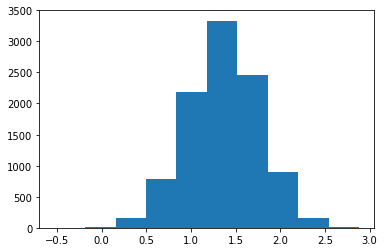

In [14]:
plt.hist(mean_diff_stat);

In [15]:
np.percentile(mean_diff_stat, 1), np.percentile(mean_diff_stat, 99)

(0.4050760508920048, 2.2843035129480955)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [16]:
mean_diff_stat_age = []

for i in range(10000):
    coffee_sample = main_sample.sample(200,replace=True)
    mean_h_older = coffee_sample[coffee_sample['age']=='>=21']['height'].mean()
    mean_h_younger = coffee_sample[coffee_sample['age']=='<21']['height'].mean()
    mean_diff_age = mean_h_older - mean_h_younger
    mean_diff_stat_age.append(mean_diff_age)

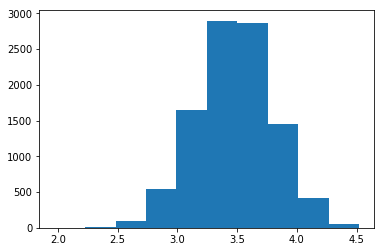

In [17]:
plt.hist(mean_diff_stat_age);

In [18]:
np.percentile(mean_diff_stat_age, 1), np.percentile(mean_diff_stat_age, 99)

(2.725092482063793, 4.211082376903223)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [19]:
mean_diff_stat_U21 = []

for i in range(10000):
    coffee_sample = main_sample.sample(200,replace=True)
    mean_h_coffee = coffee_sample[(coffee_sample['age']=='<21')&(coffee_sample['drinks_coffee']==True)]['height'].mean()
    mean_h_nocoffee = coffee_sample[(coffee_sample['age']=='<21')&(coffee_sample['drinks_coffee']==False)]['height'].mean()
    mean_diff = mean_h_coffee - mean_h_nocoffee
    mean_diff_stat_U21.append(mean_diff)

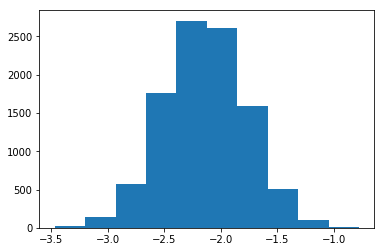

In [20]:
plt.hist(mean_diff_stat_U21);

In [21]:
np.percentile(mean_diff_stat_U21, 2.5), np.percentile(mean_diff_stat_U21, 97.5)

(-2.8492953294621923, -1.4256444576518572)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [24]:
mean_diff_stat_21plus = []

for i in range(10000):
    coffee_sample = main_sample.sample(200,replace=True)
    mean_h_coffee = coffee_sample[(coffee_sample['age']=='>=21')&(coffee_sample['drinks_coffee']==True)]['height'].mean()
    mean_h_nocoffee = coffee_sample[(coffee_sample['age']=='>=21')&(coffee_sample['drinks_coffee']==False)]['height'].mean()
    mean_diff = mean_h_coffee - mean_h_nocoffee
    mean_diff_stat_21plus.append(mean_diff)

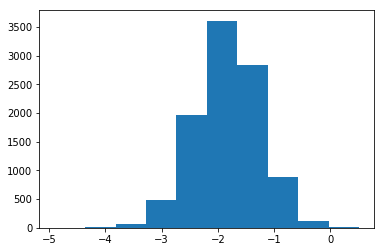

In [25]:
plt.hist(mean_diff_stat_21plus);

In [29]:
np.percentile(mean_diff_stat_21plus, 2.5), np.percentile(mean_diff_stat_21plus, 97.5)

(-2.9545182192707258, -0.7279450735172746)